In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%config InlineBackend.figure_format = 'svg'
rock_character = pd.read_excel('../data/模型数据副本.xlsx',sheet_name = '材料')
device_wob = pd.read_excel('../data/模型数据副本.xlsx',sheet_name = '设备wob')
device_T = pd.read_excel('../data/模型数据副本.xlsx',sheet_name = '设备T')
device_wob['time'] = [int(temp) for temp in device_wob['时间/s']]
device_T['time'] = [int(temp) for temp in device_T['时间/s']]
device_S = pd.read_excel('../data/模型数据副本.xlsx',sheet_name = '设备S')
device_Z = pd.read_excel('../data/模型数据副本.xlsx',sheet_name = '设备Z')
del device_wob['时间/s']
del device_T['时间/s']
columns = ['材料2','材料4','材料5','材料7','材料8','材料10','材料11','材料13','材料55','材料21','材料22']
res_df = pd.DataFrame(columns=['wob_min','wob_max','wob_mean','wob_std','wob_skew','wob_kurt','T_min','T_max','T_mean','T_std','T_skew','T_kurt','S','Z','res'])

for time in range(1050,1406,3):
    device_wob_temp = device_wob[(device_wob['time']>=time) & (device_wob['time']<(time+3))]
    device_T_temp = device_T[(device_T['time']>=time) & (device_T['time']<(time+3))]
    
    device_wob_temp_des = device_wob_temp[columns].describe()
    device_T_temp_des = device_T_temp[columns].describe()
    
    #每三钟算一组，统计特征,取少的这个device_T_mean
    for column in columns:
        wob_min = device_wob_temp_des[column]['min']
        wob_max = device_wob_temp_des[column]['max']
        wob_mean = device_wob_temp_des[column]['mean']
        wob_std = device_wob_temp_des[column]['std']
        wob_skew = device_wob_temp[column].skew()#偏度计算
        wob_kurt = device_wob_temp[column].kurt()#峰度计算        

        T_min = device_T_temp_des[column]['min']
        T_max = device_T_temp_des[column]['max']
        T_mean = device_T_temp_des[column]['mean']
        T_std = device_T_temp_des[column]['std']
        T_skew = device_T_temp[column].skew()#偏度计算
        T_kurt = device_T_temp[column].kurt()#峰度计算  


        S = device_S[column].values[0]
        Z = device_Z[column].values[0]
        res = column
        row = {'wob_min':wob_min,'wob_max':wob_max,'wob_mean':wob_mean,'wob_std':wob_std,'wob_skew':wob_skew,'wob_kurt':wob_kurt,'T_min':T_min,'T_max':T_max,'T_mean':T_mean,'T_std':T_std,'T_skew':T_skew,'T_kurt':T_kurt,'S':S,'Z':Z,'res':res}
        res_df.loc[len(res_df)] = row

res = pd.merge(left=res_df,right = rock_character, left_on = 'res', right_on ='岩性名称')
# 显示所有列
pd.set_option('display.max_columns', None)
res = res.drop(['序号', '岩性名称', '粒径', '拉强比', '脆性指数'], axis=1)
res.head(n=10)

,wob_min,wob_max,wob_mean,wob_std,wob_skew,wob_kurt,T_min,T_max,T_mean,T_std,T_skew,T_kurt,S,Z,res,设备S,设备Z,静态抗压强度,弹性模量,泊松比,抗拉强度,黏聚力,内摩擦角,回弹均值,动态强度,滑动摩擦系数,声级,波速,密度均值,渗透率,孔隙度,标定温度
0,3.00286,3.65089,3.413814,0.236150,-1.001939,-0.280232,7.998,11.970,10.143500,1.191906,-0.029635,-0.159510,101.4,2.4,材料2,101.4,2.4,110.95,53.58,0.26,6.65,11.85,38.44,62.0,193.0,0.153,115.7,5.49,2.86,0.00176,2.08,60.21
1,2.94301,3.68661,3.445723,0.233032,-1.300229,1.825893,7.729,11.722,9.896000,1.476044,-0.212896,-1.272081,101.4,2.4,材料2,101.4,2.4,110.95,53.58,0.26,6.65,11.85,38.44,62.0,193.0,0.153,115.7,5.49,2.86,0.00176,2.08,60.21
2,3.13777,3.58919,3.452857,0.162115,-0.970448,-0.402823,7.371,11.553,9.998000,1.337848,-0.663097,-0.087198,101.4,2.4,材料2,101.4,2.4,110.95,53.58,0.26,6.65,11.85,38.44,62.0,193.0,0.153,115.7,5.49,2.86,0.00176,2.08,60.21
3,3.12568,3.66841,3.462618,0.197012,-0.965071,-0.315246,7.635,11.316,9.723333,1.133635,-0.272630,0.348469,101.4,2.4,材料2,101.4,2.4,110.95,53.58,0.26,6.65,11.85,38.44,62.0,193.0,0.153,115.7,5.49,2.86,0.00176,2.08,60.21
4,3.09211,3.70193,3.497716,0.172160,-1.359834,3.232517,7.677,11.896,9.825100,1.427393,-0.221311,-1.061463,101.4,2.4,材料2,101.4,2.4,110.95,53.58,0.26,6.65,11.85,38.44,62.0,193.0,0.153,115.7,5.49,2.86,0.00176,2.08,60.21
5,3.08004,3.70812,3.386474,0.185854,-0.200894,0.630906,7.814,11.970,9.915000,1.485106,0.265430,-1.271927,101.4,2.4,材料2,101.4,2.4,110.95,53.58,0.26,6.65,11.85,38.44,62.0,193.0,0.153,115.7,5.49,2.86,0.00176,2.08,60.21
6,3.04238,3.75137,3.461536,0.196606,-0.667626,1.681516,8.141,11.822,9.702000,1.233535,0.315310,-1.174216,101.4,2.4,材料2,101.4,2.4,110.95,53.58,0.26,6.65,11.85,38.44,62.0,193.0,0.153,115.7,5.49,2.86,0.00176,2.08,60.21
7,3.03917,3.79027,3.482330,0.211688,-0.872401,1.943167,8.035,11.601,9.445444,1.268357,0.692701,-0.957530,101.4,2.4,材料2,101.4,2.4,110.95,53.58,0.26,6.65,11.85,38.44,62.0,193.0,0.153,115.7,5.49,2.86,0.00176,2.08,60.21
8,2.89840,3.75573,3.388337,0.271653,-0.691519,-0.109878,8.325,11.938,9.625500,1.370101,0.831022,-1.068247,101.4,2.4,材料2,101.4,2.4,110.95,53.58,0.26,6.65,11.85,38.44,62.0,193.0,0.153,115.7,5.49,2.86,0.00176,2.08,60.21
9,2.98792,3.81703,3.469089,0.291996,-0.227357,-1.116429,7.677,11.179,9.774333,1.163278,-0.742342,-0.561894,101.4,2.4,材料2,101.4,2.4,110.95,53.58,0.26,6.65,11.85,38.44,62.0,193.0,0.153,115.7,5.49,2.86,0.00176,2.08,60.21


In [4]:
# 计算VAF（Variance Accounted For）
def calculate_vaf(y_true, y_pred):
    vaf = 1 - np.var(y_true - y_pred) / np.var(y_true)
    return vaf * 100  # 返回百分比形式

# 计算MAPE（Mean Absolute Percentage Error）
def calculate_mape(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mape

# 计算SPI（Standardized Prediction Index）
# SPI = (预测值 - 真实值) / 真实值的标准差
def calculate_spi(y_true, y_pred):
    spi = np.mean((y_pred - y_true) / np.std(y_true))
    return spi

In [8]:
###svm
import numpy as np
import pandas as pd
import time
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


columns = ['设备S','设备Z','静态抗压强度', '弹性模量', '泊松比', '抗拉强度', '黏聚力', '内摩擦角', '回弹均值', '动态强度', '滑动摩擦系数', '声级', '波速', '密度均值', '渗透率', '孔隙度', '标定温度']

plt.rcParams['font.sans-serif'] = ['SimHei', 'Songti SC', 'STFangsong']
plt.rcParams['axes.unicode_minus'] = False

xx = ['wob_min','wob_max','wob_mean','wob_std','wob_skew','wob_kurt','T_min','T_max','T_mean','T_std','T_skew','T_kurt']

# 加载数据集
X = res[xx]

temp_res_csv = pd.DataFrame(columns=['参数','拟合结果','值'])

for pred_y in columns:

    ## Y为要预测的数值
    y = res[pred_y]

    # 划分数据集为训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 数据预处理：对特征进行标准化
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 创建SVR模型
    # 注意：SVR的默认核函数是RBF（径向基函数），你可以通过kernel参数更改核函数
    svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

    # 训练模型
    svr_model.fit(X_train_scaled, y_train)

    # 进行预测
    y_pred = svr_model.predict(X_test_scaled)


    #数据保存
    temp_csv = pd.DataFrame(columns=['ytest','ypred'])
    temp_csv['ytest'] = y_test
    temp_csv['ypred'] = y_pred
    temp_csv.to_csv("./新增数据/svm_"+pred_y+'.csv',index=None,encoding='utf-8-sig')


    # 评估模型
    from sklearn.metrics import mean_squared_error
    mse = mean_squared_error(y_test, y_pred)
    r2score = r2_score(y_test, y_pred)
    bst_rmse = mean_squared_error(y_test, y_pred) ** 0.5
    vaf = calculate_vaf(y_test, y_pred)
    mape = calculate_mape(y_test, y_pred)
    spi = calculate_spi(y_test, y_pred)
    
    # 直接追加新行
    temp_res_csv.loc[len(temp_res_csv)] = [pred_y, "均方误差(MSE):", mse]  # 需要确保新行数据与列数匹配
    temp_res_csv.loc[len(temp_res_csv)] = [pred_y,'R方：', r2score]
    temp_res_csv.loc[len(temp_res_csv)] = [pred_y,'rmse:', bst_rmse]
    temp_res_csv.loc[len(temp_res_csv)] = [pred_y,'vaf:', vaf]
    temp_res_csv.loc[len(temp_res_csv)] = [pred_y,'mape:', mape]
    temp_res_csv.loc[len(temp_res_csv)] = [pred_y,'spi:', spi]
    
    print(pred_y,"均方误差(MSE):", mse)
    print(pred_y,'R方：', r2score)
    print(pred_y,'rmse:', bst_rmse)
    print(pred_y,'vaf:', vaf)
    print(pred_y,'mape:', mape)
    print(pred_y,'spi:', spi)
temp_res_csv.to_csv("./新增数据/svm_"+"res"+'.csv',index=None,encoding='utf-8-sig')

设备S 均方误差(MSE): 42.57680415144836
设备S R方： 0.5438081146659464
设备S rmse: 6.525090355807217
设备S vaf: 57.37810076572847
设备S mape: 3.9063843027014515
设备S spi: -0.17312681187886092
设备Z 均方误差(MSE): 0.03118174773187467
设备Z R方： 0.9247557563618657
设备Z rmse: 0.17658354320795205
设备Z vaf: 92.47836976850947
设备Z mape: 6.232937373202859
设备Z spi: 0.005285955280648993
静态抗压强度 均方误差(MSE): 736.0528583654626
静态抗压强度 R方： 0.6764114841421445
静态抗压强度 rmse: 27.130294107610823
静态抗压强度 vaf: 68.59155849408137
静态抗压强度 mape: 32.31553057747709
静态抗压强度 spi: 0.09748897783169747
弹性模量 均方误差(MSE): 60.22963602356689
弹性模量 R方： 0.802610312463425
弹性模量 rmse: 7.760775478234562
弹性模量 vaf: 80.48148902577292
弹性模量 mape: 13.27752152027154
弹性模量 spi: 0.046952931690194676
泊松比 均方误差(MSE): 0.0012824427480916038
泊松比 R方： -0.06632556652179611
泊松比 rmse: 0.03581120981049934
泊松比 vaf: 0.0
泊松比 mape: 11.430765913970276
泊松比 spi: 0.2575375050779905
抗拉强度 均方误差(MSE): 3.871481609233601
抗拉强度 R方： 0.4975695785959472
抗拉强度 rmse: 1.9676080934051885
抗拉强度 vaf: 53.013472483

In [9]:
###随机森林
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error


columns = ['设备S','设备Z','静态抗压强度', '弹性模量', '泊松比', '抗拉强度', '黏聚力', '内摩擦角', '回弹均值', '动态强度', '滑动摩擦系数', '声级', '波速', '密度均值', '渗透率', '孔隙度', '标定温度']

plt.rcParams['font.sans-serif'] = ['SimHei', 'Songti SC', 'STFangsong']
plt.rcParams['axes.unicode_minus'] = False

xx = ['wob_min','wob_max','wob_mean','wob_std','wob_skew','wob_kurt','T_min','T_max','T_mean','T_std','T_skew','T_kurt']

# 加载数据集
X = res[xx]

temp_res_csv = pd.DataFrame(columns=['参数','拟合结果','值'])
for pred_y in columns:

    ## Y为要预测的数值
    y = res[pred_y]

    # 划分数据集为训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 创建随机森林回归模型
    # n_estimators表示树的数量，max_depth表示树的最大深度
    rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)

    # 训练模型
    rf_regressor.fit(X_train, y_train)

    # 使用模型进行预测
    y_pred = rf_regressor.predict(X_test)

    # 评估模型
    mse = mean_squared_error(y_test, y_pred)
    r2score = r2_score(y_test, y_pred)
    bst_rmse = mean_squared_error(y_test, y_pred) ** 0.5


    vaf = calculate_vaf(y_test, y_pred)
    mape = calculate_mape(y_test, y_pred)
    spi = calculate_spi(y_test, y_pred)
    



    #数据保存
    temp_csv = pd.DataFrame(columns=['ytest','ypred'])
    temp_csv['ytest'] = y_test
    temp_csv['ypred'] = y_pred
    temp_csv.to_csv("./新增数据/随机森林_"+pred_y+'.csv',index=None,encoding='utf-8-sig')
    

    
    # 直接追加新行
    temp_res_csv.loc[len(temp_res_csv)] = [pred_y, "均方误差(MSE):", mse]  # 需要确保新行数据与列数匹配
    temp_res_csv.loc[len(temp_res_csv)] = [pred_y,'R方：', r2score]
    temp_res_csv.loc[len(temp_res_csv)] = [pred_y,'rmse:', bst_rmse]
    temp_res_csv.loc[len(temp_res_csv)] = [pred_y,'vaf:', vaf]
    temp_res_csv.loc[len(temp_res_csv)] = [pred_y,'mape:', mape]
    temp_res_csv.loc[len(temp_res_csv)] = [pred_y,'spi:', spi]
    
    print(pred_y,"均方误差(MSE):", mse)
    print(pred_y,'R方：', r2score)
    print(pred_y,'rmse:', bst_rmse)
    print(pred_y,'vaf:', vaf)
    print(pred_y,'mape:', mape)
    print(pred_y,'spi:', spi)

    
temp_res_csv.to_csv("./新增数据/随机森林_"+"res"+'.csv',index=None,encoding='utf-8-sig')

设备S 均方误差(MSE): 1.5003513396946924
设备S R方： 0.9839243898183582
设备S rmse: 1.224888296823303
设备S vaf: 98.40920196471107
设备S mape: 0.5788593478502452
设备S spi: -0.012947193856301002
设备Z 均方误差(MSE): 0.012197423664122041
设备Z R方： 0.9705665658694762
设备Z rmse: 0.11044194703156061
设备Z vaf: 97.05922640558298
设备Z mape: 2.1344914439509752
设备Z spi: -0.005069337861460103
静态抗压强度 均方误差(MSE): 43.51514307068717
静态抗压强度 R方： 0.9808695796727761
静态抗压强度 rmse: 6.596600872471152
静态抗压强度 vaf: 98.09702841734153
静态抗压强度 mape: 3.13185598237835
静态抗压强度 spi: -0.01003516320939859
弹性模量 均方误差(MSE): 5.618971332442757
弹性模量 R方： 0.9815850290851191
弹性模量 rmse: 2.370436949687284
弹性模量 vaf: 98.1629657982871
弹性模量 mape: 1.884272295274412
弹性模量 spi: -0.00668048634097683
泊松比 均方误差(MSE): 8.336713740458102e-05
泊松比 R方： 0.9306818880183723
泊松比 rmse: 0.009130560629259356
泊松比 vaf: 93.07531470606754
泊松比 mape: 1.3492323685031025
泊松比 spi: -0.008441507110890504
抗拉强度 均方误差(MSE): 0.6723357380534365
抗拉强度 R方： 0.9127460847574415
抗拉强度 rmse: 0.8199608149499807
抗

In [15]:
#GBDT

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error


columns = ['设备S','设备Z','静态抗压强度', '弹性模量', '泊松比', '抗拉强度', '黏聚力', '内摩擦角', '回弹均值', '动态强度', '滑动摩擦系数', '声级', '波速', '密度均值', '渗透率', '孔隙度', '标定温度']

xx = ['wob_min','wob_max','wob_mean','wob_std','wob_skew','wob_kurt','T_min','T_max','T_mean','T_std','T_skew','T_kurt']

# 加载数据集
X = res[xx]

temp_res_csv = pd.DataFrame(columns=['参数','拟合结果','值'])
for pred_y in columns:
    ## Y为要预测的数值
    y = res[pred_y]

    # 划分数据集为训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 划分数据集为训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 创建GBDT回归模型
    # n_estimators表示要训练的树的数量，max_depth表示每棵树的最大深度
    gbdt_regressor = GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=42)

    # 训练模型
    gbdt_regressor.fit(X_train, y_train)

    # 使用模型进行预测
    y_pred = gbdt_regressor.predict(X_test)

    
    
    # 评估模型
    mse = mean_squared_error(y_test, y_pred)
    r2score = r2_score(y_test, y_pred)
    bst_rmse = mean_squared_error(y_test, y_pred) ** 0.5
    vaf = calculate_vaf(y_test, y_pred)
    mape = calculate_mape(y_test, y_pred)
    spi = calculate_spi(y_test, y_pred)
     
    
    #数据保存
    temp_csv = pd.DataFrame(columns=['ytest','ypred'])
    temp_csv['ytest'] = y_test
    temp_csv['ypred'] = y_pred
    temp_csv.to_csv("./新增数据/GBDT_"+pred_y+'.csv',index=None,encoding='utf-8-sig')

    # 直接追加新行
    temp_res_csv.loc[len(temp_res_csv)] = [pred_y, "均方误差(MSE):", mse]  # 需要确保新行数据与列数匹配
    temp_res_csv.loc[len(temp_res_csv)] = [pred_y,'R方：', r2score]
    temp_res_csv.loc[len(temp_res_csv)] = [pred_y,'rmse:', bst_rmse]
    temp_res_csv.loc[len(temp_res_csv)] = [pred_y,'vaf:', vaf]
    temp_res_csv.loc[len(temp_res_csv)] = [pred_y,'mape:', mape]
    temp_res_csv.loc[len(temp_res_csv)] = [pred_y,'spi:', spi]
    
    print(pred_y,"均方误差(MSE):", mse)
    print(pred_y,'R方：', r2score)
    print(pred_y,'rmse:', bst_rmse)
    print(pred_y,'vaf:', vaf)
    print(pred_y,'mape:', mape)
    print(pred_y,'spi:', spi)
temp_res_csv.to_csv("./新增数据/GBDT_"+"res"+'.csv',index=None,encoding='utf-8-sig')

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
设备S 均方误差(MSE): 1.4433665464892724
设备S R方： 0.9845349570219294
设备S rmse: 1.201401908808735
设备S vaf: 98.47555100850316
设备S mape: 0.9853328773793694
设备S spi: -0.014851029025026274
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
设备Z 均方误差(MSE): 0.01504252885806009
设备Z R方： 0.9637010819258048
设备Z rmse: 0.12264798758259382
设备Z vaf: 96.3741643277421
设备Z mape: 3.34741963715377
设备Z spi: -0.0063687794447654265
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
静态抗压强度 均方误差(MSE): 63.91193938562993
静态抗压强度 R方： 0.971902602678129
静态抗压强度 rmse: 7.994494317067836
静态抗压强度 vaf: 97.19723740642306
静态抗压强度 mape: 5.39331203626221
静态抗压强度 spi: -0.008352926798521697
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
弹性模量 均方误差(MSE): 7.990268164183297
弹性模量 R方： 0.9738136133573104
弹性模量 rmse: 2.826706239456675
弹性模量 vaf: 97.38265017700165
弹性模量 mape: 3.1704945940166067
弹性模量 spi: -0.003590043552106441
<class 'pandas.core.series.Series'>


In [21]:
#cnn加bp
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

rock_character = pd.read_excel('../data/模型数据副本.xlsx',sheet_name = '材料', engine='openpyxl')
device_wob = pd.read_excel('../data/模型数据副本.xlsx',sheet_name = '设备wob', engine='openpyxl')
device_T = pd.read_excel('../data/模型数据副本.xlsx',sheet_name = '设备T', engine='openpyxl')
device_wob['time'] = [int(temp) for temp in device_wob['时间/s']]
device_T['time'] = [int(temp) for temp in device_T['时间/s']]
device_S = pd.read_excel('../data/模型数据副本.xlsx',sheet_name = '设备S', engine='openpyxl')
device_Z = pd.read_excel('../data/模型数据副本.xlsx',sheet_name = '设备Z', engine='openpyxl')
del device_wob['时间/s']
del device_T['时间/s']
columns = ['材料2','材料4','材料5','材料7','材料8','材料10','材料11','材料13','材料55','材料21','材料22']




yy = ['设备S','设备Z','静态抗压强度', '弹性模量', '泊松比', '抗拉强度', '黏聚力', '内摩擦角', '回弹均值', '动态强度', '滑动摩擦系数', '声级', '波速', '密度均值', '渗透率', '孔隙度', '标定温度']

temp_res_csv = pd.DataFrame(columns=['参数','拟合结果','值'])
for pred_y in yy:
    res_df = pd.DataFrame(columns=['time1','time2','time3','time4','time5','time6','time7','time8','time9','time10','res'])
    T_samples = []
    wob_samples = []
    outputs = []
    for time in range(0,len(device_T)-1,10):
        device_wob_temp = device_wob[time:time+10]
        device_T_temp = device_T[time:time+10]
        for column in columns:
            T_samples.append(device_T_temp[column].values)
            wob_samples.append(device_wob_temp[column].values)
            output = rock_character[rock_character['岩性名称']==column][pred_y].values[0]
            outputs.append(output)

    # 将T和wob样本转换为多通道输入
    T_data = np.array(T_samples).reshape(-1, len(T_samples[0]), 1)  # (样本数, 时间步长, 1)
    wob_data = np.array(wob_samples).reshape(-1, len(wob_samples[0]), 1)  # (样本数, 时间步长, 1)

    # 将T和wob拼接为一个多通道输入
    input_data = np.concatenate((T_data, wob_data), axis=-1)  # 形状变为(样本数, 时间步长, 特征数*2)

    # 目标输出整理为二维数组
    output_data = np.array(outputs).reshape(-1, 1)
    # 构建模型
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_data.shape[1:]))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=1, activation='linear'))  # 对于回归问题，最后的输出层通常使用线性激活函数

    model.compile(loss='mean_squared_error', optimizer='adam')  # 使用均方误差损失函数和Adam优化器

    #划分训练集和测试集

    X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2, random_state=42)
    # 训练模型
    model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=0)  

    # 预测
    prediction = model.predict(X_test)
    #评估模型精度mse、rmse、r2

    y_test = [x[0] for x in y_test]
    prediction = [x[0] for x in prediction]
    y_test = pd.Series(y_test)

    mse = mean_squared_error(y_test, prediction)
    print(pred_y,"均方误差：", mse)
    rmse = np.sqrt(mse)
    print(pred_y,"均方根误差：", rmse)

    r2 = r2_score(y_test, prediction)
    print(pred_y,"R2：", r2)
    vaf = calculate_vaf(y_test, prediction)
    mape = calculate_mape(y_test, prediction)
    spi = calculate_spi(y_test, prediction)

    #数据保存
    temp_csv = pd.DataFrame(columns=['ytest','ypred'])
    temp_csv['ytest'] = y_test
    temp_csv['ypred'] = prediction
    temp_csv.to_csv("./新增数据/cnn_bp_"+pred_y+'.csv',index=None,encoding='utf-8-sig')
    
    # 直接追加新行
    temp_res_csv.loc[len(temp_res_csv)] = [pred_y, "均方误差(MSE):", mse]  # 需要确保新行数据与列数匹配
    temp_res_csv.loc[len(temp_res_csv)] = [pred_y,'R方：', r2]
    temp_res_csv.loc[len(temp_res_csv)] = [pred_y,'rmse:', rmse]
    temp_res_csv.loc[len(temp_res_csv)] = [pred_y,'vaf:', vaf]
    temp_res_csv.loc[len(temp_res_csv)] = [pred_y,'mape:', mape]
    temp_res_csv.loc[len(temp_res_csv)] = [pred_y,'spi:', spi]
    
    print(pred_y,'vaf:', vaf)
    print(pred_y,'mape:', mape)
    print(pred_y,'spi:', spi)
temp_res_csv.to_csv("./新增数据/cnn_bp_"+"res"+'.csv',index=None,encoding='utf-8-sig')    
    
    

8/8 [==============================] - 0s 1ms/step
设备S 均方误差： 3.0095254255300223
设备S 均方根误差： 1.7347983818098351
设备S R2： 0.9682254107604052
设备S vaf: 96.8545673843511
设备S mape: 1.8300257149839596
设备S spi: -0.017895895705600476
8/8 [==============================] - 0s 1ms/step
设备Z 均方误差： 0.031046223575526614
设备Z 均方根误差： 0.17619938585456707
设备Z R2： 0.918094233358996
设备Z vaf: 92.03979019100302
设备Z mape: 6.7035638963219055
设备Z spi: 0.04799654728242691
8/8 [==============================] - 0s 1ms/step
静态抗压强度 均方误差： 128.0553930132619
静态抗压强度 均方根误差： 11.316156282645707
静态抗压强度 R2： 0.9425838442900116
静态抗压强度 vaf: 95.06457573536213
静态抗压强度 mape: 9.256541187147459
静态抗压强度 spi: -0.08978815658877046
8/8 [==============================] - 0s 1ms/step
弹性模量 均方误差： 20.67066971958783
弹性模量 均方根误差： 4.54650082146565
弹性模量 R2： 0.925926351735921
弹性模量 vaf: 93.86873811073593
弹性模量 mape: 6.54778646421353
弹性模量 spi: 0.11296472622654528
8/8 [==============================] - 0s 1ms/step
泊松比 均方误差： 0.00025207741960294274
泊松比 均方根误

In [15]:
#计算测试集精度和训练集精度
columns = ['设备S','设备Z','静态抗压强度', '弹性模量', '泊松比', '抗拉强度', '黏聚力', '内摩擦角', '回弹均值', '动态强度', '滑动摩擦系数', '声级', '波速', '密度均值', '渗透率', '孔隙度', '标定温度']

import xgboost as xgb
from xgboost import plot_importance,plot_tree
import numpy as np
import pandas as pd
import time
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
plt.rcParams['font.sans-serif'] = ['SimHei', 'Songti SC', 'STFangsong']
plt.rcParams['axes.unicode_minus'] = False

xx = ['wob_min','wob_max','wob_mean','wob_std','wob_skew','wob_kurt','T_min','T_max','T_mean','T_std','T_skew','T_kurt']
X = res[xx]

temp_res_csv = pd.DataFrame(columns=['参数','迭代次数','训练集R平方','测试集R平方'])

for pred_y in columns:
    for num_round in [10,20,30,40,50,60,70,80,90,100]:
        ## Y为要预测的数值
        y = res[pred_y]
        feature_name =X.columns
        #将数据分割训练数据与测试数据
        #print(np.isnan(X).any())
        from sklearn.model_selection import train_test_split
        # 随机采样20%的数据构建测试样本，其余作为训练样本
        Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,test_size=0.2,random_state=1)

        dtrain = xgb.DMatrix(Xtrain, ytrain,feature_names=feature_name)
        dtest = xgb.DMatrix(Xtest,feature_names=feature_name)
        #{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
        params = {'booster':'gbtree',
                  'objective':'reg:squarederror',
                  'eta':0.1,
                  'gamma':0,
               #  'alpha':0,
               #  'lambda':3,
                  'max_depth':7,
                  'subsample':0.6849912226732566,
                  'colsample_bytree':0.9269737580495006,
                  'min_child_weight':1,
                  'learning_rate':0.1970728149783871,
                #  'seed':1000,
                  'nthread':1
                  }
        bst = xgb.train(params, dtrain, num_round)
        bst_ypred = bst.predict(dtest)
        r2score = r2_score(ytest, bst_ypred)
        
        
        train_pred = bst.predict(dtrain)
        train_r2score = r2_score(ytrain, train_pred)
        temp_res_csv.loc[len(temp_res_csv)] = [pred_y,num_round, train_r2score,r2score]
        print(pred_y,num_round,'The train R2_score = {}'.format(train_r2score),'The test R2_score = {}'.format(r2score))
    
temp_res_csv.to_csv("./新增数据/XGBoost_遗传算法_"+"res"+'.csv',index=None,encoding='utf-8-sig')

设备S 10 The train R2_score = 0.20091717080784444 The test R2_score = 0.23272277130145158
设备S 20 The train R2_score = 0.9827231441873461 The test R2_score = 0.9685624887521717
设备S 30 The train R2_score = 0.9979993417885766 The test R2_score = 0.9844077603979546
设备S 40 The train R2_score = 0.9991933235819445 The test R2_score = 0.9855714914991752
设备S 50 The train R2_score = 0.9995694085659109 The test R2_score = 0.9855755657059866
设备S 60 The train R2_score = 0.9997777196791713 The test R2_score = 0.9859767912839884
设备S 70 The train R2_score = 0.9998943980523755 The test R2_score = 0.9862402412958581
设备S 80 The train R2_score = 0.9999383961274501 The test R2_score = 0.9863443470190444
设备S 90 The train R2_score = 0.9999676205824111 The test R2_score = 0.9864231260408449
设备S 100 The train R2_score = 0.9999803470937405 The test R2_score = 0.9864495603821121
设备Z 10 The train R2_score = 0.8465742008429076 The test R2_score = 0.8325023354454679
设备Z 20 The train R2_score = 0.9946853484479455 The 

动态强度 60 The train R2_score = 0.9996811774758523 The test R2_score = 0.9799495086273811
动态强度 70 The train R2_score = 0.9998133584121607 The test R2_score = 0.980015316633641
动态强度 80 The train R2_score = 0.9998903189317989 The test R2_score = 0.9801351658601433
动态强度 90 The train R2_score = 0.9999370797155106 The test R2_score = 0.9800707526332749
动态强度 100 The train R2_score = 0.9999637276726706 The test R2_score = 0.9801593372824424
滑动摩擦系数 10 The train R2_score = -0.0016500276565609706 The test R2_score = -0.10254039079865374
滑动摩擦系数 20 The train R2_score = 0.9767619929751643 The test R2_score = 0.9392062651930618
滑动摩擦系数 30 The train R2_score = 0.9960500902602702 The test R2_score = 0.9642942635190394
滑动摩擦系数 40 The train R2_score = 0.9983788732189999 The test R2_score = 0.9668303975730336
滑动摩擦系数 50 The train R2_score = 0.9991857813159629 The test R2_score = 0.9670983263321369
滑动摩擦系数 60 The train R2_score = 0.9995546850581931 The test R2_score = 0.9672767467681553
滑动摩擦系数 70 The train R2_sc

In [23]:
#保存训练集和测试集的数据
columns = ['设备S','设备Z','静态抗压强度', '弹性模量', '泊松比', '抗拉强度', '黏聚力', '内摩擦角', '回弹均值', '动态强度', '滑动摩擦系数', '声级', '波速', '密度均值', '渗透率', '孔隙度', '标定温度']

import xgboost as xgb
from xgboost import plot_importance,plot_tree
import numpy as np
import pandas as pd
import time
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
plt.rcParams['font.sans-serif'] = ['SimHei', 'Songti SC', 'STFangsong']
plt.rcParams['axes.unicode_minus'] = False

xx = ['wob_min','wob_max','wob_mean','wob_std','wob_skew','wob_kurt','T_min','T_max','T_mean','T_std','T_skew','T_kurt']
X = res[xx]

temp_res_csv = pd.DataFrame(columns=['参数','拟合结果','值'])

for pred_y in columns:
    ## Y为要预测的数值
    y = res[pred_y]
    feature_name =X.columns
    #将数据分割训练数据与测试数据
    #print(np.isnan(X).any())
    from sklearn.model_selection import train_test_split
    # 随机采样20%的数据构建测试样本，其余作为训练样本
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,test_size=0.2,random_state=1)

    dtrain = xgb.DMatrix(Xtrain, ytrain,feature_names=feature_name)
    dtest = xgb.DMatrix(Xtest,feature_names=feature_name)
    #{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
    params = {'booster':'gbtree',
              'objective':'reg:squarederror',
              'eta':0.1,
              'gamma':0,
           #  'alpha':0,
           #  'lambda':3,
              'max_depth':7,
              'subsample':0.6849912226732566,
              'colsample_bytree':0.9269737580495006,
              'min_child_weight':1,
              'learning_rate':0.1970728149783871,
            #  'seed':1000,
              'nthread':1
              }
    num_round = 50


    bst = xgb.train(params, dtrain, num_round)


    # 保存模型
    bst.save_model("./模型/model_"+pred_y+".xgb")  # 将模型保存为model.xgb文件

    # 加载已保存的模型
    loaded_bst = xgb.Booster()
    loaded_bst.load_model("./模型/model_"+pred_y+".xgb")  # 从model.xgb文件加载模型

    # 使用加载后的模型进行预测
    bst_ypred = loaded_bst.predict(dtest)
    
    mse = mean_squared_error(ytest, bst_ypred)
    r2score = r2_score(ytest, bst_ypred)
    bst_rmse = mean_squared_error(ytest, bst_ypred) ** 0.5
    vaf = calculate_vaf(ytest, bst_ypred)
    mape = calculate_mape(ytest, bst_ypred)
    spi = calculate_spi(ytest, bst_ypred)

    #数据保存
    temp_csv = pd.DataFrame(columns=['ytest','ypred'])
    temp_csv['ytest'] = ytest
    temp_csv['ypred'] = bst_ypred
    temp_csv.to_csv("./拟合结果/测试集_"+pred_y+'.csv',index=None,encoding='utf-8-sig')

    # 直接追加新行
    temp_res_csv.loc[len(temp_res_csv)] = [pred_y, "均方误差(MSE):", mse]  # 需要确保新行数据与列数匹配
    temp_res_csv.loc[len(temp_res_csv)] = [pred_y,'R方：', r2score]
    temp_res_csv.loc[len(temp_res_csv)] = [pred_y,'rmse:', bst_rmse]
    temp_res_csv.loc[len(temp_res_csv)] = [pred_y,'vaf:', vaf]
    temp_res_csv.loc[len(temp_res_csv)] = [pred_y,'mape:', mape]
    temp_res_csv.loc[len(temp_res_csv)] = [pred_y,'spi:', spi]
    
    print(pred_y,"均方误差(MSE):", mse)
    print(pred_y,'R方：', r2score)
    print(pred_y,'rmse:', bst_rmse)
    print(pred_y,'vaf:', vaf)
    print(pred_y,'mape:', mape)
    print(pred_y,'spi:', spi)
   

    
    
    
    
    train_pred = loaded_bst.predict(dtrain)
    train_csv = pd.DataFrame(columns=['ytrain','ypred'])
    train_csv['ytrain'] = ytrain
    train_csv['ypred'] = train_pred
    train_csv.to_csv("./拟合结果/训练集_"+pred_y+'.csv',index=None,encoding='utf-8-sig')    
    
    print(pred_y,'done')
temp_res_csv.to_csv("./拟合结果/ga_xgb_"+"res"+'.csv',index=None,encoding='utf-8-sig') 

设备S 均方误差(MSE): 1.4393715002196976
设备S R方： 0.9855755657059866
设备S rmse: 1.1997380965109417
设备S vaf: 98.5810478563938
设备S mape: 0.8811782858537207
设备S spi: -0.015326867192985396
设备S done
设备Z 均方误差(MSE): 0.008518338730112407
设备Z R方： 0.9788755638000233
设备Z rmse: 0.09229484671482155
设备Z vaf: 97.897718842473
设备Z mape: 2.214957659603606
设备Z spi: -0.01008090396277033
设备Z done
静态抗压强度 均方误差(MSE): 17.016499030222352
静态抗压强度 R方： 0.9927671764414977
静态抗压强度 rmse: 4.125105941696813
静态抗压强度 vaf: 99.28064175766946
静态抗压强度 mape: 2.6645321773700226
静态抗压强度 spi: -0.006264274514816081
静态抗压强度 done
弹性模量 均方误差(MSE): 3.6233620971863276
弹性模量 R方： 0.9872245060548227
弹性模量 rmse: 1.9035130935158622
弹性模量 vaf: 98.7231798075236
弹性模量 mape: 1.7987339348873015
弹性模量 spi: -0.002700374124674354
弹性模量 done
泊松比 均方误差(MSE): 6.591845822358077e-05
泊松比 R方： 0.9475446123866885
泊松比 rmse: 0.008119018304178207
泊松比 vaf: 94.79810657234754
泊松比 mape: 1.8347112629093494
泊松比 spi: -0.02089146564477626
泊松比 done
抗拉强度 均方误差(MSE): 0.4133100026658089
抗拉强度 R方

In [5]:
#结合遗传算法优化
#结合遗传算法优化
import random
import numpy as np
from deap import base, creator, tools
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import xgboost as xgb
xx = ['wob_min','wob_max','wob_mean','wob_std','wob_skew','wob_kurt','T_min','T_max','T_mean','T_std','T_skew','T_kurt']
X = res[xx]
## Y为要预测的数值
y = res["泊松比"]
feature_name =X.columns
# 初始化creator
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# 设置如下参数范围
param_bounds = {
    'max_depth': (3, 10),  # 对于需要整数的参数，我们将使用randint
    'learning_rate': (0.01, 0.3),
    'subsample': (0.05, 1.0),
    'colsample_bytree': (0.05, 1.0),
}

# 初始化toolbox
toolbox = base.Toolbox()

# 注册属性生成器
toolbox.register("attr_max_depth", random.randint, *param_bounds['max_depth'])  # 整数生成器
for key, bound in filter(lambda item: item[0] != 'max_depth', param_bounds.items()):
    min_value, max_value = bound
    toolbox.register(f"attr_{key}", random.uniform, min_value, max_value)

# 创建个体生成器
toolbox.register("individual", tools.initCycle, creator.Individual,
                 [(toolbox.attr_max_depth if key == 'max_depth' else getattr(toolbox, f"attr_{key}"))
                  for key in param_bounds.keys()],
                 n=1)

# 创建种群生成器
toolbox.register("population", tools.initRepeat, list, toolbox.individual)


# 注册适应度函数
def eval_fitness(individual):
    params = dict(zip(param_bounds.keys(), individual))
    
    params['max_depth'] = int(params['max_depth'])
    params['learning_rate'] = params['learning_rate'] if (0 < params['learning_rate'] < 1) else random.uniform(0.01,0.3)
    params['subsample'] = params['subsample'] if (0< params['subsample']< 1) else random.uniform(0,1)
    params['colsample_bytree'] = params['colsample_bytree'] if (0< params['colsample_bytree']< 1) else random.uniform(0,1)
    
    #print(params)
    # 使用新的参数训练模型
    model = XGBRegressor(**params)
    
    # 训练集和测试集划分保持不变
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=1)
    dtrain = xgb.DMatrix(Xtrain, ytrain, feature_names=feature_name)
    dtest = xgb.DMatrix(Xtest, feature_names=feature_name)
    
    model.fit(Xtrain, ytrain)
    predictions = model.predict(Xtest)

    # 使用R²分数作为适应度函数
    #fitness = r2_score(ytest, predictions)
    fitness = calculate_vaf(ytest, predictions)
    return fitness,

toolbox.register("evaluate", eval_fitness)

# 注册选择、交叉和变异算子
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.1)

# 设置遗传算法参数
POPULATION_SIZE = 100
MAX_GENERATIONS = 100
CXPB = 0.7
MUTPB = 0.1


# 运行遗传算法
pop = toolbox.population(n=POPULATION_SIZE)

# 新增变量用于记录每一代的信息
all_pop_scores = []
all_best_params = []

temp_res_csv = pd.DataFrame(columns=['遗传代数','参数','VAF'])

for g in range(MAX_GENERATIONS):
    offspring = toolbox.select(pop, len(pop))
    offspring = list(map(toolbox.clone, offspring))

    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < CXPB:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values

    for mutant in offspring:
        if random.random() < MUTPB:
            toolbox.mutate(mutant)
            del mutant.fitness.values


    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)

    # 更新所有个体的适应度，并记录这一代所有个体的适应度得分
    for ind, fit in zip(offspring, fitnesses):
        ind.fitness.values = fit
        if ind.fitness.values:  # 只记录非空适应度的个体
            all_pop_scores.append(ind.fitness.values[0])


    pop[:] = offspring

    # 每一代结束后，记录最优个体参数及其对应的R²分数
    best_individual = tools.selBest(pop, 1)[0]
    best_params_this_gen = dict(zip(param_bounds.keys(), best_individual))
    best_fit_this_gen = best_individual.fitness.values[0]
    
    all_best_params.append((best_params_this_gen, best_fit_this_gen))
    print(f"{g}-Best Parameters : {best_params_this_gen}")
    print(f"{g}-Best Fitness (vaf): {best_fit_this_gen}")  
    
    best_params_this_gen['max_depth'] = int(best_params_this_gen['max_depth'])
    best_params_this_gen['learning_rate'] = best_params_this_gen['learning_rate'] if (0 < best_params_this_gen['learning_rate'] < 1) else random.uniform(0.1,0.3)
    best_params_this_gen['subsample'] = best_params_this_gen['subsample'] if (0< best_params_this_gen['subsample']< 1) else random.uniform(0,1)
    best_params_this_gen['colsample_bytree'] = best_params_this_gen['colsample_bytree'] if (0< best_params_this_gen['colsample_bytree']< 1) else random.uniform(0,1)
    
    
    
    temp_res_csv.loc[len(temp_res_csv)] = [g,best_params_this_gen, best_fit_this_gen]

temp_res_csv.to_csv("./yichuan/遗传算法迭代次数与参数变化和结果变化_泊松比GENERATIONS"+str(MAX_GENERATIONS)+"size"+str(POPULATION_SIZE)+'.csv',index=None,encoding='utf-8-sig')

/Users/pengxb/opt/miniconda3/envs/yjclassify/lib/python3.8/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/pengxb/opt/miniconda3/envs/yjclassify/lib/python3.8/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


0-Best Parameters : {'max_depth': 9, 'learning_rate': 0.19250387710334899, 'subsample': 0.8549833581895218, 'colsample_bytree': 0.9594545180782941}
0-Best Fitness (vaf): 97.08087432968206
1-Best Parameters : {'max_depth': 7, 'learning_rate': 0.10129378599747581, 'subsample': 0.6888322500136609, 'colsample_bytree': 0.46608983642835494}
1-Best Fitness (vaf): 97.12803268407235
2-Best Parameters : {'max_depth': 9, 'learning_rate': 0.13309069207629626, 'subsample': 0.6215085005177152, 'colsample_bytree': 0.84090171290917}
2-Best Fitness (vaf): 97.05212650350573
3-Best Parameters : {'max_depth': 7, 'learning_rate': 0.08450770093960376, 'subsample': 0.2306384944834987, 'colsample_bytree': 0.7388511244211257}
3-Best Fitness (vaf): 97.05212650350573
4-Best Parameters : {'max_depth': 8, 'learning_rate': 0.045716619011186815, 'subsample': 0.5681504862278485, 'colsample_bytree': 0.4056087783041299}
4-Best Fitness (vaf): 96.98367918740813
5-Best Parameters : {'max_depth': 7, 'learning_rate': 0.2979

43-Best Parameters : {'max_depth': 7, 'learning_rate': 0.10771472179842723, 'subsample': 1.1064498163122483, 'colsample_bytree': 0.8078626646014879}
43-Best Fitness (vaf): 96.97551887617712
44-Best Parameters : {'max_depth': 7, 'learning_rate': 0.21020983862898993, 'subsample': 1.1064498163122483, 'colsample_bytree': 0.8078626646014879}
44-Best Fitness (vaf): 96.82552430836613
45-Best Parameters : {'max_depth': 6.918971341774286, 'learning_rate': 0.29799855244888973, 'subsample': 0.45261982665884765, 'colsample_bytree': 0.8078626646014879}
45-Best Fitness (vaf): 97.01046711214846
46-Best Parameters : {'max_depth': 8, 'learning_rate': 0.21020983862898993, 'subsample': 0.45261982665884765, 'colsample_bytree': 0.9153346440315918}
46-Best Fitness (vaf): 97.01046711214846
47-Best Parameters : {'max_depth': 6.918971341774286, 'learning_rate': 0.21020983862898993, 'subsample': 0.9063988585933205, 'colsample_bytree': 0.8078626646014879}
47-Best Fitness (vaf): 97.08412400329196
48-Best Paramete

85-Best Parameters : {'max_depth': 7, 'learning_rate': 0.21020983862898993, 'subsample': 0.9063988585933205, 'colsample_bytree': 0.9202499737263764}
85-Best Fitness (vaf): 96.99813829877132
86-Best Parameters : {'max_depth': 7, 'learning_rate': 0.09614314032904903, 'subsample': 0.9063988585933205, 'colsample_bytree': 0.9153346440315918}
86-Best Fitness (vaf): 97.05339184231002
87-Best Parameters : {'max_depth': 7, 'learning_rate': 0.09614314032904903, 'subsample': 0.9063988585933205, 'colsample_bytree': 0.9153346440315918}
87-Best Fitness (vaf): 96.99813829877132
88-Best Parameters : {'max_depth': 7, 'learning_rate': 0.21020983862898993, 'subsample': 0.9063988585933205, 'colsample_bytree': 0.9202499737263764}
88-Best Fitness (vaf): 96.99813829877132
89-Best Parameters : {'max_depth': 7, 'learning_rate': 0.21020983862898993, 'subsample': 0.9063988585933205, 'colsample_bytree': 0.9202499737263764}
89-Best Fitness (vaf): 96.99813829877132
90-Best Parameters : {'max_depth': 7, 'learning_ra

<Figure size 1000x600 with 0 Axes>

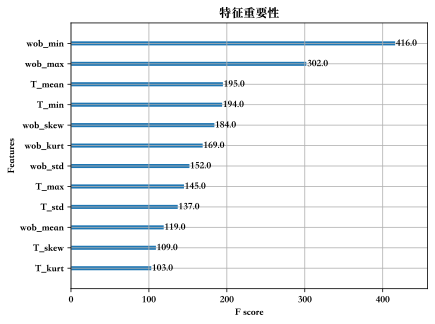

特征：wob_min，重要性得分：416.0
特征：wob_max，重要性得分：302.0
特征：wob_mean，重要性得分：119.0
特征：wob_std，重要性得分：152.0
特征：wob_skew，重要性得分：184.0
特征：wob_kurt，重要性得分：169.0
特征：T_min，重要性得分：194.0
特征：T_max，重要性得分：145.0
特征：T_mean，重要性得分：195.0
特征：T_std，重要性得分：137.0
特征：T_skew，重要性得分：109.0
特征：T_kurt，重要性得分：103.0


In [13]:
##绘制特征重要性
#计算测试集精度和训练集精度
columns = ['静态抗压强度']

import xgboost as xgb
from xgboost import plot_importance,plot_tree
import numpy as np
import pandas as pd
import time
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
plt.rcParams['font.sans-serif'] = ['SimHei', 'Songti SC', 'STFangsong']
plt.rcParams['axes.unicode_minus'] = False

xx = ['wob_min','wob_max','wob_mean','wob_std','wob_skew','wob_kurt','T_min','T_max','T_mean','T_std','T_skew','T_kurt']
X = res[xx]


for pred_y in columns:
    for num_round in [50]:
        ## Y为要预测的数值
        y = res[pred_y]
        feature_name =X.columns
        #将数据分割训练数据与测试数据
        #print(np.isnan(X).any())
        from sklearn.model_selection import train_test_split
        # 随机采样20%的数据构建测试样本，其余作为训练样本
        Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,test_size=0.2,random_state=1)

        dtrain = xgb.DMatrix(Xtrain, ytrain,feature_names=feature_name)
        dtest = xgb.DMatrix(Xtest,feature_names=feature_name)
        #{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
        params = {'booster':'gbtree',
                  'objective':'reg:squarederror',
                  'eta':0.1,
                  'gamma':0,
               #  'alpha':0,
               #  'lambda':3,
                  'max_depth':7,
                  'subsample':0.6849912226732566,
                  'colsample_bytree':0.9269737580495006,
                  'min_child_weight':1,
                  'learning_rate':0.1970728149783871,
                #  'seed':1000,
                  'nthread':1
                  }
        bst = xgb.train(params, dtrain, num_round)
        
        bst_ypred = bst.predict(dtest)
        r2score = r2_score(ytest, bst_ypred)
        
        # 绘制特征重要性图
        # 如果特征名含有中文，确保你的环境中matplotlib能够正确显示中文
        plt.figure(figsize=(10, 6))
        xgb.plot_importance(bst, importance_type='weight') 
        plt.title('特征重要性')
        plt.savefig('特征重要性.png', dpi=300, bbox_inches='tight')
        plt.show()
        importance_scores = bst.get_score(importance_type='weight')  # 或者使用'gain', 'cover'

        # 打印特征重要性
        for feature, score in importance_scores.items():
            print(f"特征：{feature}，重要性得分：{score}")
